In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv('/content/drive/MyDrive/21_05_total_Performa 미터 값.csv',encoding='cp949')

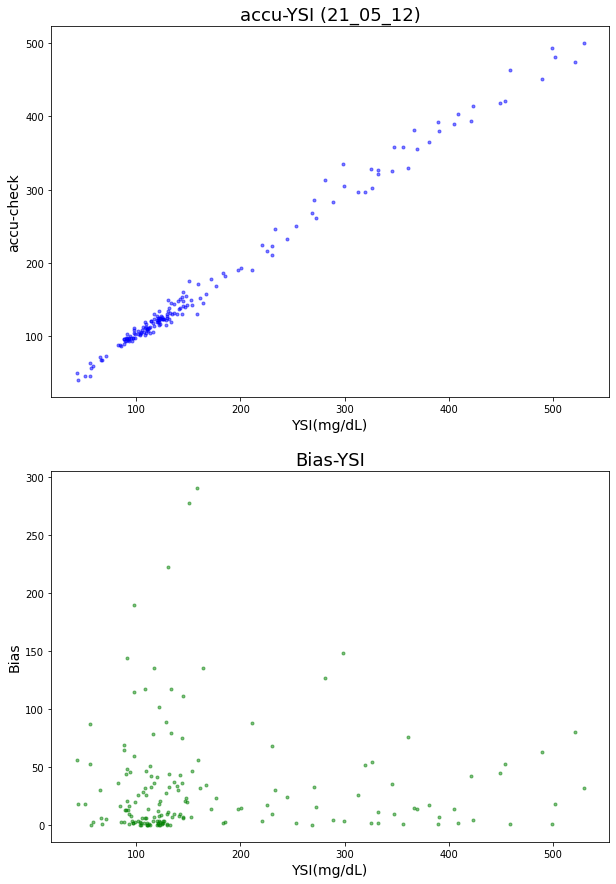

In [16]:
x = df['YSI']
y = df['Bias']
z = df['AC']

plt.figure(figsize=(10,15))
plt.subplot(2, 1, 1)
plt.plot(x,z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.title('accu-YSI (21_05_12)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.subplot(2, 1, 2)
plt.plot(x,y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.title('Bias-YSI', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('Bias', fontsize=14)

#plt.tight_layout()
plt.show()

In [17]:
n = len(x)

X = pd.DataFrame(x) # YSI
Y = pd.DataFrame(y) # Bias
Z = pd.DataFrame(z) # accu-check

from itertools import product 
from itertools import combinations

list_X = np.array(X['YSI'].tolist())
list_Y = np.array(Y['Bias'].tolist())
list_Z = np.array(Z['AC'].tolist())

n = len(X)

yij = list(combinations(list_Y,2))
zij = list(combinations(list_Z,2))


yi = []
yj = []

for i in range(len(yij)):
  a = yij[i]
  yi.append(a[0])
  yj.append(a[1])

zi = []
zj = []

for i in range(len(zij)):
  a = zij[i]
  zi.append(a[0])
  zj.append(a[1])


xij = list(combinations(list_X,2)) 

xi = []
xj = []

for i in range(len(xij)):
  a = xij[i]
  xi.append(a[0])
  xj.append(a[1])


ncomb = len(xi)
ncomb # 점의 개수


14535

## ■ Passing-Bablok Regresstion
### ○ accu_YSI

In [18]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (zi-zj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (zi[i]-zj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Z['AC'][i] - X['YSI'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(round(intercept,2)," & ",round(slope,2))

6.51  &  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


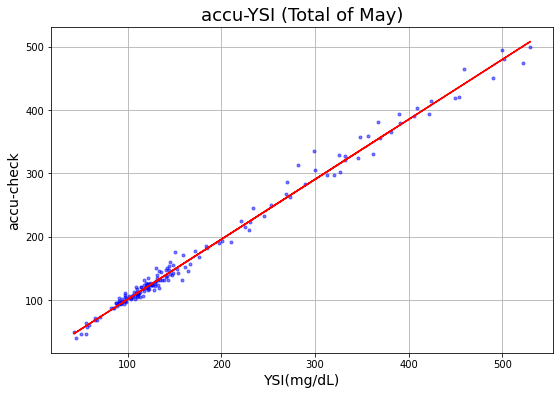

In [19]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('accu-YSI (Total of May)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.grid(True)
plt.show()

## ■ Passing-Bablok Regresstion
### ○ Bias_YSI

In [20]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (yi-yj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (yi[i]-yj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Y['Bias'][i] - X['YSI'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(round(intercept,2)," & ",round(slope,2))

-6.98  &  0.13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


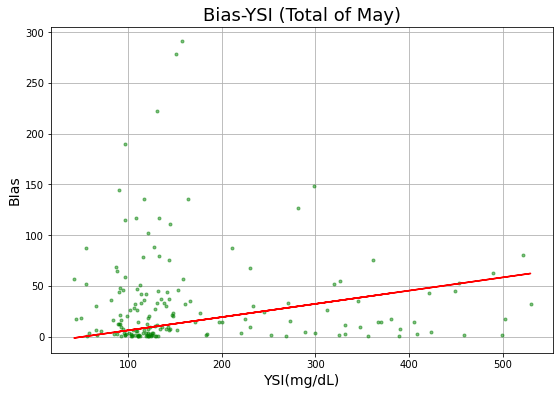

In [21]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('Bias-YSI (Total of May)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('BIas', fontsize=14)
plt.grid(True)
plt.show()